In [10]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import patches
import xarray as xr
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
import pandas as pd
import fitting_template
import importlib
#from IPython.display import display, Math
from astropy.modeling import models, fitting, Fittable1DModel, Parameter
from scipy.optimize import curve_fit
importlib.reload(fitting_template)
import fitting_template
from fitting_template import FeXII_fit
from fitting_template import myGaussian1D
from scipy.integrate import simps

In [11]:
#read dataset
awsom_data_set = scipy.io.readsav('../save/awsom_contrib_newnew.sav',verbose = True,python_dict=True)

--------------------------------------------------
Date: Mon Aug 24 15:47:19 2020
User: yjzhu
Host: Yingjies-MacBook-Pro.local
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 5 records of which:
 - 2 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - x [<class 'numpy.ndarray'>]
 - w [<class 'numpy.ndarray'>]
--------------------------------------------------


In [6]:
awsom_data_set_197 = scipy.io.readsav('../save/awsom_ctb_197.sav',verbose = False,python_dict=True)
awsom_data_set_184 = scipy.io.readsav('../save/awsom_ctb_184.sav',verbose = False,python_dict=True)

In [3]:
awsom_data_set['x'].shape

(3, 61, 601, 500)

In [12]:
awsom_wvl = awsom_data_set['x'][0,0,0,:]
awsom_x = awsom_data_set['x'][1,0,:,0]
awsom_y = awsom_data_set['x'][2,:,0,0]
awsom_int = awsom_data_set['w']

In [7]:
awsom_wvl_197 = awsom_data_set_197['x'][0,0,0,:]
awsom_int_197 = awsom_data_set_197['w']

awsom_wvl_184 = awsom_data_set_184['x'][0,0,0,:]
awsom_int_184 = awsom_data_set_184['w']

In [28]:
np.argmin(np.abs(awsom_wvl - 185.4))

245

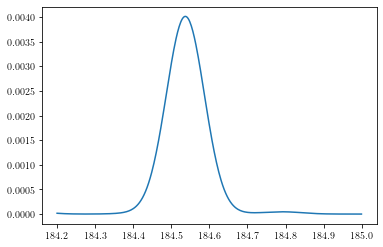

In [40]:
plt.plot(awsom_wvl_184[100:],awsom_int_184[0,370,100:])

In [13]:
ctb_195 = simps(x=awsom_wvl[150:],y=awsom_int[:,:,150:],axis=2)
ctb_197 = simps(x=awsom_wvl_197[160:],y=awsom_int_197[:,:,160:],axis=2)
ctb_184 = simps(x=awsom_wvl_184[100:],y=awsom_int_184[:,:,100:],axis=2)
#ctb_185 = simps(x=awsom_wvl[230:245],y=awsom_int[:,:,230:245],axis=2)

In [14]:
%store ctb_195
%store ctb_197
%store ctb_184

Stored 'ctb_195' (ndarray)
Stored 'ctb_197' (ndarray)
Stored 'ctb_184' (ndarray)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


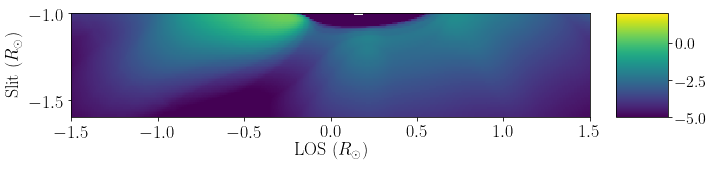

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
im = ax.pcolormesh(-awsom_x,awsom_y,np.log10(ctb_195),vmin=-5,vmax=2)
ax.set_xlabel(r'LOS $(R_\odot)$',fontsize=18)
ax.axis('scaled')
ax.set_ylabel(r'Slit $(R_\odot)$',fontsize=18)
ax.tick_params(labelsize=18)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
#clb_ax.set_ylabel(r'$\xi\ (\mathrm{km\cdot s^{-1}})$',fontsize=16)
plt.subplots_adjust(bottom = 0.12,left=0.2,top=0.97,right=0.8)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


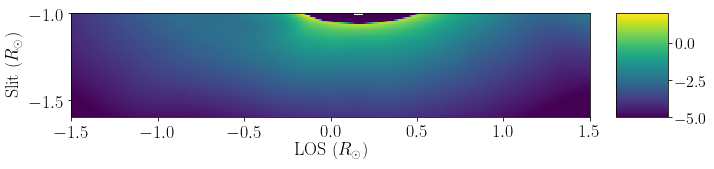

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
im = ax.pcolormesh(-awsom_x,awsom_y,np.log10(ctb_185),vmin=-5,vmax=2)
ax.set_xlabel(r'LOS $(R_\odot)$',fontsize=18)
ax.axis('scaled')
ax.set_ylabel(r'Slit $(R_\odot)$',fontsize=18)
ax.tick_params(labelsize=18)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
#clb_ax.set_ylabel(r'$\xi\ (\mathrm{km\cdot s^{-1}})$',fontsize=16)
plt.subplots_adjust(bottom = 0.12,left=0.2,top=0.97,right=0.8)